In [1]:
from google.colab import drive
import os
import numpy as np
import librosa
# Montar Google Drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import librosa
import pandas as pd
import numpy as np

In [3]:
path="/content/drive/Shareddrives/brenda/Proyecto 4/CNN/aplanade/mfcc_features_train.csv"

In [4]:
df=pd.read_csv(path,header=None)

In [5]:
path="/content/drive/Shareddrives/brenda/Proyecto 4/train.csv"

In [6]:
label=pd.read_csv(path)

In [7]:
label=pd.DataFrame(label)

In [9]:
# output con valores binarios
label['class'].replace({'NoWhale':0, 'RightWhale':1}, inplace=True)

In [10]:
Y= label['class']

In [11]:
Y

,class
0,0
1,1
2,0
3,0
4,0
...,...
10929,1
10930,0
10931,0
10932,1


In [12]:
Y.value_counts()

,count
class,
0,5467
1,5467


In [13]:
X= df

In [14]:
X

,0,1,2,3,4,5,6,7,8,9,...,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739
0,-440.31810,-488.52032,-673.40765,-670.55035,-670.95450,-672.79663,-666.27730,-664.98650,-669.39075,-671.63574,...,-7.355712,-8.912169,-6.882689,-6.500583,-12.229925,-10.989838,-6.497747,-7.288597,-7.150180,-6.096953
1,-447.34450,-488.14877,-634.69806,-633.05200,-636.48670,-633.83954,-632.74550,-632.27094,-632.44904,-632.08777,...,-15.696528,-14.525082,-15.704018,-17.322735,-14.946882,-10.582205,-12.127067,-16.054390,-8.194453,-2.492720
2,-358.72656,-399.18542,-606.15940,-610.40515,-608.48620,-607.23910,-605.87170,-609.58170,-611.02890,-606.63250,...,-16.670004,-18.858496,-17.697157,-18.772130,-21.654615,-22.730537,-20.416595,-20.865953,-10.750034,-3.370242
3,-486.76968,-527.64087,-619.44745,-613.47140,-613.04670,-613.39910,-610.97675,-610.52527,-614.88740,-613.91200,...,-14.541027,-15.553032,-10.932711,-10.964237,-13.492526,-9.843382,-9.591500,-9.229680,-2.851970,-3.811036
4,-448.33716,-495.59772,-699.77850,-698.48550,-706.23040,-708.04430,-692.09380,-689.00210,-689.25440,-688.75200,...,-10.643429,-10.310877,-7.646329,-6.034199,-6.132211,-8.013046,-7.983377,-8.041624,0.202891,2.706376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10929,-494.35352,-535.19543,-646.91614,-647.54690,-646.21280,-647.73680,-649.80820,-651.12160,-651.90770,-651.32965,...,-17.848457,-20.642403,-20.401093,-16.423320,-17.110588,-17.852402,-16.770920,-18.039293,-9.437651,-3.833803
10930,-427.29724,-464.24380,-654.44730,-659.82960,-672.22660,-673.50910,-676.51330,-682.56866,-666.96735,-663.57605,...,-14.678997,-15.042357,-14.906795,-10.104181,-7.067329,-9.640999,-11.012531,-8.996246,-5.935582,1.879762
10931,-505.92172,-543.03150,-655.24080,-656.56134,-655.96497,-657.54730,-656.16880,-654.29730,-652.51556,-651.32416,...,-10.001314,-12.014816,-9.044642,-7.874530,-7.836335,-7.937490,-9.165184,-11.211866,-7.246275,-3.402816
10932,-364.11320,-404.10678,-635.29236,-636.73780,-638.23460,-636.85290,-638.47046,-638.12960,-637.32040,-639.14710,...,-18.726673,-16.822030,-17.616127,-18.864483,-19.284729,-16.812351,-15.645100,-16.446278,-7.806112,-4.838071


## Normalization

In [16]:
# Normalizo las características de MFCC
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mfcc_normalized = scaler.fit_transform(X.values)  # Normalizo los datos de MFCC

# Convierto a tensor de PyTorch
mfcc_tensor = torch.tensor(mfcc_normalized, dtype=torch.float32)

# Convierto las etiquetas a tensor
labels_tensor = torch.tensor(Y.values, dtype=torch.long)

In [17]:
# Dividir los datos en entrenamiento y prueba
train_size = int(0.8 * len(mfcc_tensor))
test_size = len(mfcc_tensor) - train_size

train_x, test_x = mfcc_tensor[:train_size], mfcc_tensor[train_size:]
train_y, test_y = labels_tensor[:train_size], labels_tensor[train_size:]

In [18]:
X

,0,1,2,3,4,5,6,7,8,9,...,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739
0,-440.31810,-488.52032,-673.40765,-670.55035,-670.95450,-672.79663,-666.27730,-664.98650,-669.39075,-671.63574,...,-7.355712,-8.912169,-6.882689,-6.500583,-12.229925,-10.989838,-6.497747,-7.288597,-7.150180,-6.096953
1,-447.34450,-488.14877,-634.69806,-633.05200,-636.48670,-633.83954,-632.74550,-632.27094,-632.44904,-632.08777,...,-15.696528,-14.525082,-15.704018,-17.322735,-14.946882,-10.582205,-12.127067,-16.054390,-8.194453,-2.492720
2,-358.72656,-399.18542,-606.15940,-610.40515,-608.48620,-607.23910,-605.87170,-609.58170,-611.02890,-606.63250,...,-16.670004,-18.858496,-17.697157,-18.772130,-21.654615,-22.730537,-20.416595,-20.865953,-10.750034,-3.370242
3,-486.76968,-527.64087,-619.44745,-613.47140,-613.04670,-613.39910,-610.97675,-610.52527,-614.88740,-613.91200,...,-14.541027,-15.553032,-10.932711,-10.964237,-13.492526,-9.843382,-9.591500,-9.229680,-2.851970,-3.811036
4,-448.33716,-495.59772,-699.77850,-698.48550,-706.23040,-708.04430,-692.09380,-689.00210,-689.25440,-688.75200,...,-10.643429,-10.310877,-7.646329,-6.034199,-6.132211,-8.013046,-7.983377,-8.041624,0.202891,2.706376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10929,-494.35352,-535.19543,-646.91614,-647.54690,-646.21280,-647.73680,-649.80820,-651.12160,-651.90770,-651.32965,...,-17.848457,-20.642403,-20.401093,-16.423320,-17.110588,-17.852402,-16.770920,-18.039293,-9.437651,-3.833803
10930,-427.29724,-464.24380,-654.44730,-659.82960,-672.22660,-673.50910,-676.51330,-682.56866,-666.96735,-663.57605,...,-14.678997,-15.042357,-14.906795,-10.104181,-7.067329,-9.640999,-11.012531,-8.996246,-5.935582,1.879762
10931,-505.92172,-543.03150,-655.24080,-656.56134,-655.96497,-657.54730,-656.16880,-654.29730,-652.51556,-651.32416,...,-10.001314,-12.014816,-9.044642,-7.874530,-7.836335,-7.937490,-9.165184,-11.211866,-7.246275,-3.402816
10932,-364.11320,-404.10678,-635.29236,-636.73780,-638.23460,-636.85290,-638.47046,-638.12960,-637.32040,-639.14710,...,-18.726673,-16.822030,-17.616127,-18.864483,-19.284729,-16.812351,-15.645100,-16.446278,-7.806112,-4.838071


In [19]:
Y

,class
0,0
1,1
2,0
3,0
4,0
...,...
10929,1
10930,0
10931,0
10932,1


## LSTM

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

In [21]:
# Normalizar los datos
scaler = StandardScaler()
mfcc_normalized = scaler.fit_transform(X.values)  #StandardScaler para estandarizar datos
mfcc_tensor = torch.tensor(mfcc_normalized, dtype=torch.float32)
labels_tensor = torch.tensor(Y.values, dtype=torch.long)

train_size = int(0.8 * len(mfcc_tensor))
test_size = len(mfcc_tensor) - train_size
train_x, test_x = mfcc_tensor[:train_size], mfcc_tensor[train_size:]
train_y, test_y = labels_tensor[:train_size], labels_tensor[train_size:]

In [22]:
df = pd.DataFrame(mfcc_normalized)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,1730,1731,1732,1733,1734,1735,1736,1737,1738,1739
0,0.706552,0.616562,-0.327839,-0.260738,-0.271155,-0.320395,-0.171480,-0.142051,-0.247573,-0.303204,...,1.311947,0.955069,1.423820,1.507057,0.223029,0.501634,1.498197,1.322677,0.119937,-0.403135
1,0.636163,0.620674,0.556868,0.596273,0.516616,0.573674,0.597073,0.606053,0.599567,0.603858,...,-0.561034,-0.301334,-0.556302,-0.912523,-0.383918,0.593331,0.238374,-0.647385,-0.137780,0.519379
2,1.523915,1.605142,1.209118,1.113858,1.156576,1.184157,1.213024,1.124887,1.090769,1.187694,...,-0.779634,-1.271332,-1.003702,-1.236574,-1.882374,-2.139432,-1.616796,-1.728756,-0.768476,0.294774
3,0.241212,0.183655,0.905420,1.043780,1.052344,1.042785,1.096016,1.103311,1.002286,1.020734,...,-0.301559,-0.531432,0.514712,0.509088,-0.059026,0.759529,0.805825,0.886430,1.180700,0.181952
4,0.626219,0.538244,-0.930545,-0.899186,-1.077396,-1.129333,-0.763198,-0.691215,-0.703082,-0.695779,...,0.573670,0.641980,1.252406,1.611329,1.585212,1.171262,1.165718,1.153438,1.934614,1.850102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10929,0.165239,0.100056,0.277624,0.264997,0.294323,0.254731,0.205994,0.174996,0.153345,0.162531,...,-1.044262,-1.670644,-1.610654,-0.711435,-0.867273,-1.042097,-0.800905,-1.093481,-0.444591,0.176125
10930,0.836992,0.885206,0.105499,-0.015719,-0.300229,-0.336746,-0.406091,-0.544102,-0.192000,-0.118349,...,-0.332541,-0.417121,-0.377350,0.701376,1.376313,0.805055,0.487803,0.938892,0.419690,1.638528
10931,0.049351,0.013342,0.087364,0.058975,0.071435,0.029579,0.060208,0.102378,0.139405,0.162657,...,0.717861,0.260568,0.938527,1.199874,1.204524,1.188258,0.901234,0.440945,0.096222,0.286437
10932,1.469953,1.550682,0.543285,0.512035,0.476667,0.504517,0.465856,0.472084,0.487858,0.441947,...,-1.241471,-0.815486,-0.985513,-1.257222,-1.352960,-0.808138,-0.548951,-0.735460,-0.041941,-0.080921


In [24]:
Y

,class
0,0
1,1
2,0
3,0
4,0
...,...
10929,1
10930,0
10931,0
10932,1


In [25]:
Ynum = np.where(Y == 1, 1,-1)
df['Yn'] = Ynum
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,1731,1732,1733,1734,1735,1736,1737,1738,1739,Yn
0,1.000000,0.994398,0.626682,0.618164,0.614068,0.611457,0.612550,0.612866,0.609578,0.605033,...,-0.347092,-0.342181,-0.346405,-0.347289,-0.352890,-0.355891,-0.335016,-0.114972,-0.070394,0.325741
1,0.994398,1.000000,0.662378,0.651695,0.645980,0.642854,0.643951,0.644376,0.641033,0.636541,...,-0.351849,-0.347408,-0.351068,-0.351115,-0.357034,-0.361132,-0.341211,-0.121528,-0.075271,0.333610
2,0.626682,0.662378,1.000000,0.991364,0.978886,0.972550,0.971392,0.971942,0.970788,0.969164,...,-0.241769,-0.236105,-0.243220,-0.242246,-0.240473,-0.251191,-0.248446,-0.117856,-0.075106,0.334719
3,0.618164,0.651695,0.991364,1.000000,0.991216,0.979017,0.973421,0.972496,0.971888,0.971234,...,-0.241005,-0.235644,-0.241916,-0.240588,-0.239223,-0.250315,-0.247423,-0.116256,-0.073972,0.334526
4,0.614068,0.645980,0.978886,0.991216,1.000000,0.991421,0.979360,0.973767,0.972195,0.971897,...,-0.240795,-0.235333,-0.240234,-0.238273,-0.239182,-0.249016,-0.246044,-0.115125,-0.072360,0.334084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1736,-0.355891,-0.361132,-0.251191,-0.250315,-0.249016,-0.246932,-0.246432,-0.245950,-0.245113,-0.244367,...,0.705648,0.706072,0.709929,0.734257,0.870964,1.000000,0.869753,0.537730,0.392369,-0.384338
1737,-0.335016,-0.341211,-0.248446,-0.247423,-0.246044,-0.244774,-0.245037,-0.243643,-0.241307,-0.241375,...,0.701060,0.701143,0.703973,0.704128,0.739721,0.869753,1.000000,0.687970,0.441835,-0.392372
1738,-0.114972,-0.121528,-0.117856,-0.116256,-0.115125,-0.115650,-0.117060,-0.115086,-0.113182,-0.114185,...,0.494010,0.504985,0.511261,0.508033,0.504154,0.537730,0.687970,1.000000,0.817176,-0.248199
1739,-0.070394,-0.075271,-0.075106,-0.073972,-0.072360,-0.073111,-0.073946,-0.072569,-0.071896,-0.072322,...,0.368902,0.380618,0.389316,0.391999,0.385072,0.392369,0.441835,0.817176,1.000000,-0.155772


In [26]:
correlation_matrix = df.corr()

In [27]:
yn_corr = correlation_matrix['Yn'].abs().sort_values(ascending=False)
print(yn_corr)

Yn      1.000000
1694    0.517161
1697    0.516740
1695    0.516152
1608    0.515919
          ...   
1311    0.027309
1309    0.027085
1310    0.026517
1308    0.025888
1307    0.019745
Name: Yn, Length: 1741, dtype: float64


In [28]:
df['Yn'].value_counts()

,count
Yn,
-1,5467
1,5467


Yn
-1    5467
 1    5467
Name: count, dtype: int64


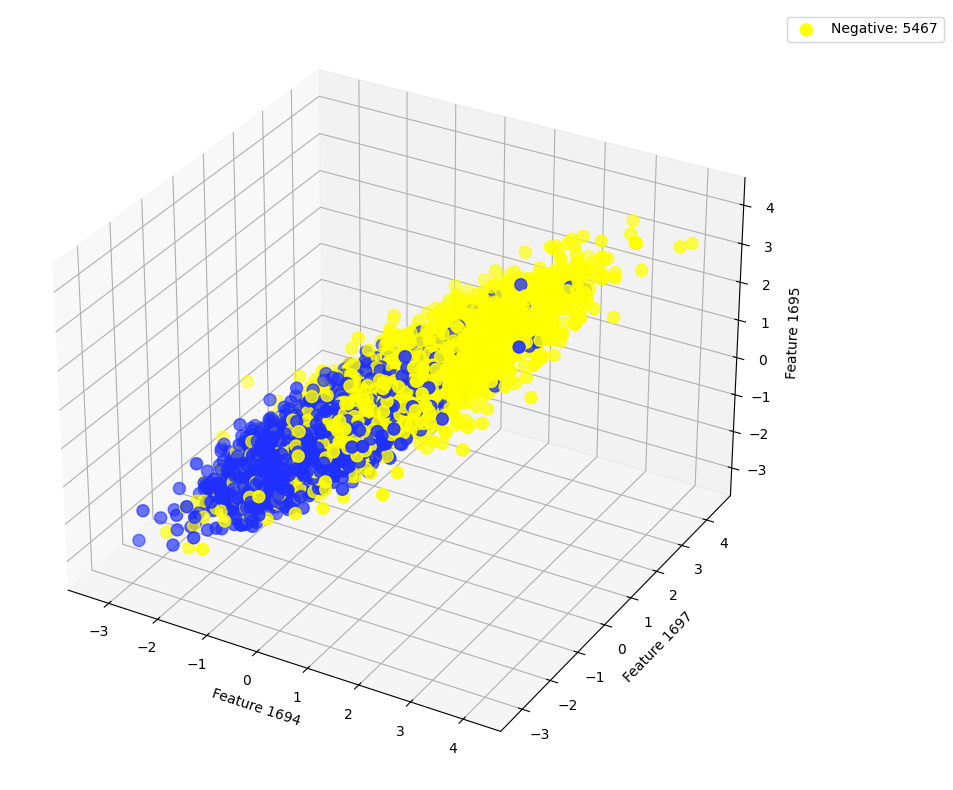

In [29]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
colors = {1: '#1F30FF', -1: '#FFFF00'}
ax.scatter(df[1694], df[1697], df[1695], c=df['Yn'].map(colors), s=75)
count = df['Yn'].value_counts()
print(count)
ax.set_xlabel('Feature 1694')
ax.set_ylabel('Feature 1697')
ax.set_zlabel('Feature 1695')
ax.legend([f'Negative: {count[-1]}',f'Positive: {count[1]}'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [102]:
import torch.nn as nn
import torch.nn.functional as F

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.dropout = nn.Dropout(0.5)  # Dropout para evitar sobreajuste
        self.fc = nn.Linear(hidden_size, hidden_size//2)  # Capa totalmente conectada para la salida
        self.fc2 = nn.Linear(hidden_size//2, hidden_size//4)  # Capa totalmente conectada para la salida
        self.fc3 = nn.Linear(hidden_size//4, 2)  # Capa totalmente conectada para la salida

    def forward(self, x):
        # Pasar los datos por la capa LSTM
        out, _ = self.lstm(x)
        out=self.dropout(out)
        out=F.relu(self.fc(out[:,-1,:]))
        out=F.relu(self.fc2(out))
        out= self.fc3(out)
        return torch.sigmoid(out)  # Aplicar la función de activación sigmoidal

# Parámetros del modelo
input_size = mfcc_tensor.shape[1]  # Número de características MFCC (20 si es por defecto)
hidden_size = 64 # Puedes ajustar este valor
output_size = 2  # 'RightWhale' o 'NoWhale', por lo que es un problema de clasificación binaria

# Crear el modelo
model = LSTMModel(input_size, hidden_size, output_size)


In [103]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Crear DataLoader para entrenamiento
train_dataset = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Crear DataLoader para prueba
test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Definir la función de pérdida y el optimizador
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 15
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        # Asegúrate de que los datos sean del tipo correcto
        inputs = inputs.unsqueeze(1)  # Ajustar las dimensiones para LSTM
        labels = F.one_hot(labels.to(torch.int64), num_classes=2).float()

        # Zero los gradientes
        optimizer.zero_grad()

        # Pasar los datos por el modelo
        outputs = model(inputs)

        # Calcular la pérdida
        loss = criterion(outputs, labels)

        # Realizar la retropropagación
        loss.backward()
        optimizer.step()

        # Acumular la pérdida
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Pérdida: {running_loss/len(train_loader)}")

# Guardar el modelo entrenado
torch.save(model.state_dict(), 'lstm_model.pth')

Epoch 1/15, Pérdida: 0.4926842678963703
Epoch 2/15, Pérdida: 0.4067874628588231
Epoch 3/15, Pérdida: 0.388312919677174
Epoch 4/15, Pérdida: 0.3687185198068619
Epoch 5/15, Pérdida: 0.3623197005286704
Epoch 6/15, Pérdida: 0.3520599839134808
Epoch 7/15, Pérdida: 0.35406728681639166
Epoch 8/15, Pérdida: 0.35062989491942154
Epoch 9/15, Pérdida: 0.34390049947113016
Epoch 10/15, Pérdida: 0.33306505884567317
Epoch 11/15, Pérdida: 0.3303447621908501
Epoch 12/15, Pérdida: 0.3299918806683408
Epoch 13/15, Pérdida: 0.3258685540870158
Epoch 14/15, Pérdida: 0.3236272952852458
Epoch 15/15, Pérdida: 0.31930176535770843


In [104]:
# Evaluación del modelo en el conjunto de prueba
model.eval()  # Cambiar a modo de evaluación
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión en el conjunto de prueba: 83.77%


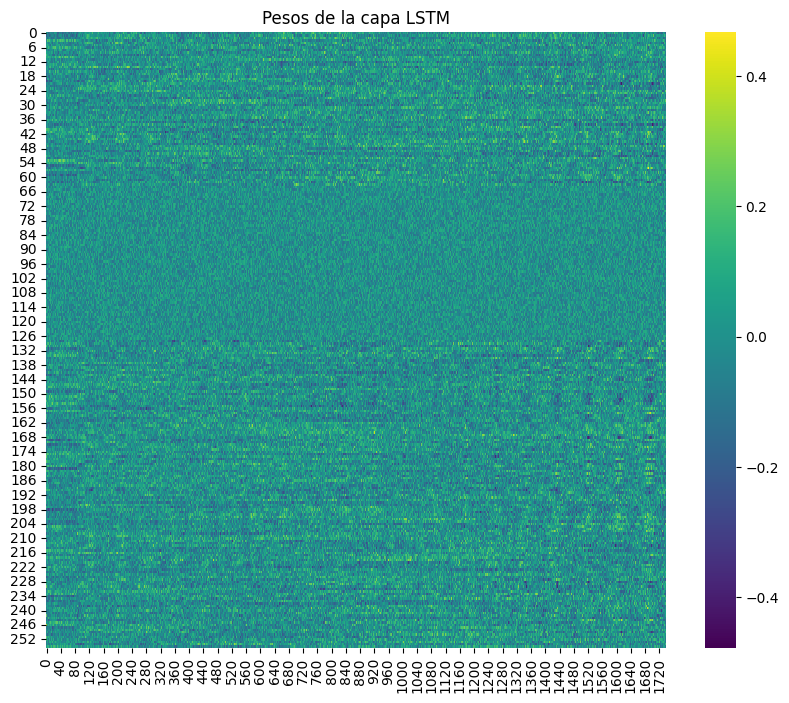

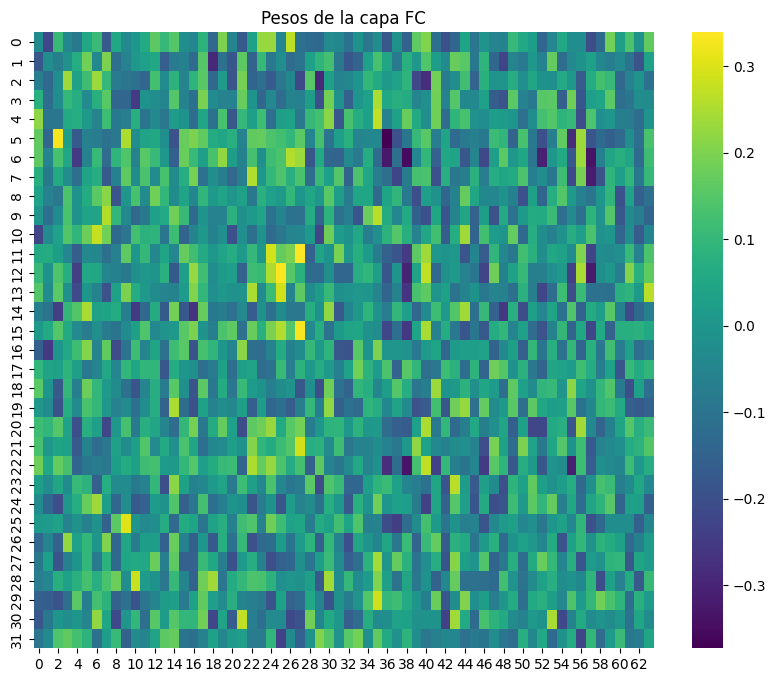

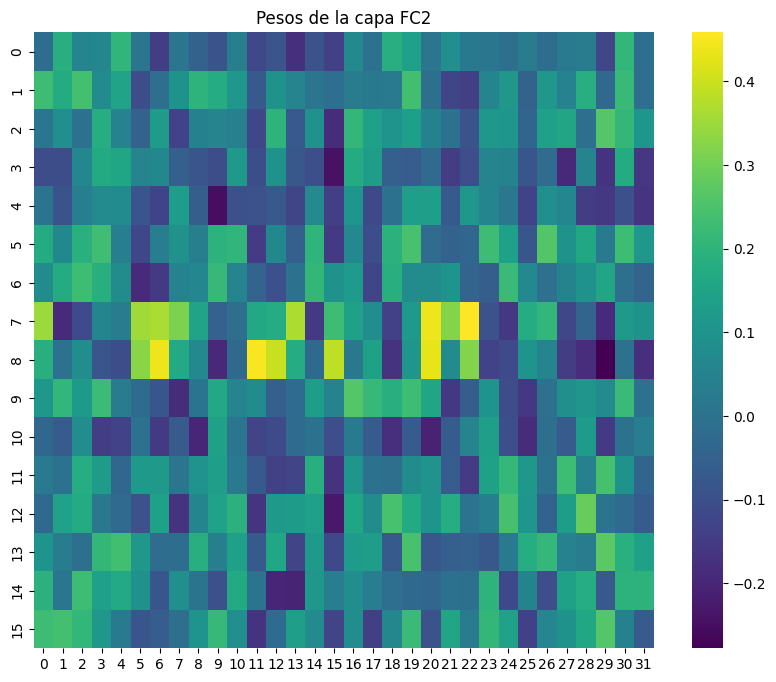

Text(0.5, 1.0, 'Pesos de la capa FC3')

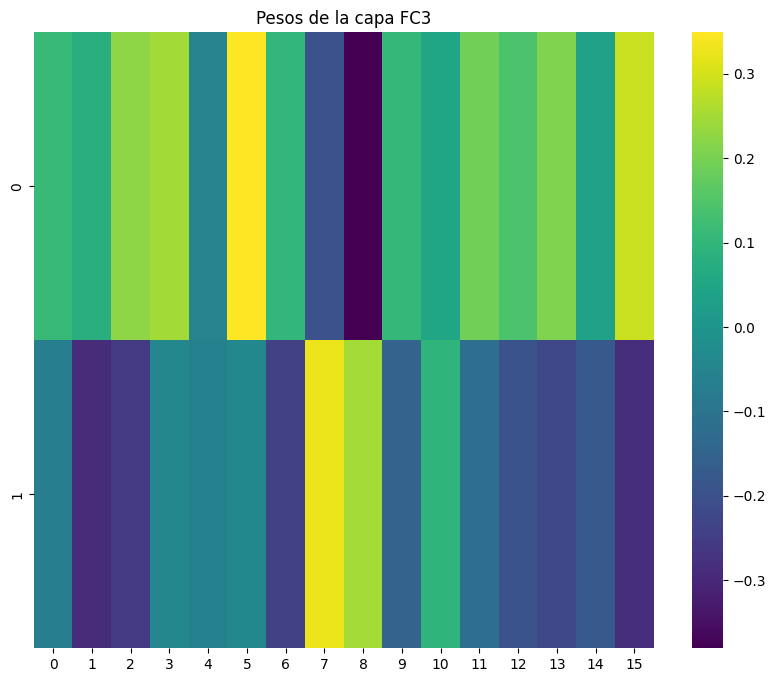

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

#Pesos de la capa LSTM
weight_rnn=model.lstm.weight_ih_l0.detach().cpu().numpy()
plt.figure(figsize=(10,8))
sns.heatmap(weight_rnn, cmap="viridis",annot=False)
plt.title("Pesos de la capa LSTM")

#Pesos de la capa FC
weight_fc1=model.fc.weight.detach().cpu().numpy()
plt.figure(figsize=(10,8))
sns.heatmap(weight_fc1, cmap="viridis",annot=False)
plt.title("Pesos de la capa FC")
plt.show()

#pesos de la capa fc2
weight_fc2=model.fc2.weight.detach().cpu().numpy()
plt.figure(figsize=(10,8))
sns.heatmap(weight_fc2, cmap="viridis",annot=False)
plt.title("Pesos de la capa FC2")
plt.show()

#pesos fc3
weight_fc3=model.fc3.weight.detach().cpu().numpy()
plt.figure(figsize=(10,8))
sns.heatmap(weight_fc3, cmap="viridis",annot=False)
plt.title("Pesos de la capa FC3")



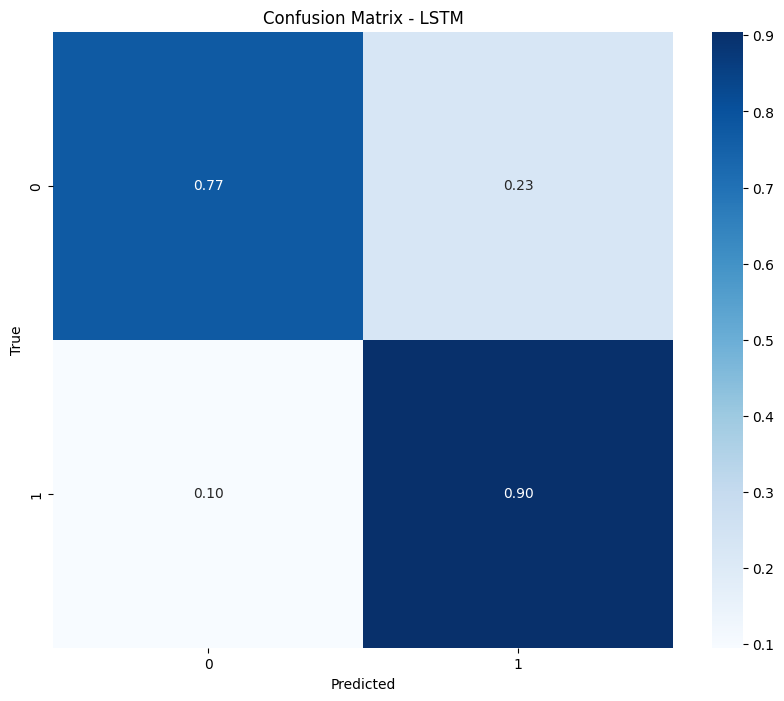

In [106]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

test_data=[]
test_labels=[]
model.eval()
predictions=[]
true_labels=[]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels= labels.to(device)

        if inputs.dim() == 2:
          inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

cm=confusion_matrix(true_labels,predictions)
cm_porcentaje=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

plt.figure(figsize=(10,8))
sns.heatmap(cm_porcentaje, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LSTM')
plt.show()


## RNN

In [107]:
import torch.nn as nn

class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(RNNModel, self).__init__()
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, bidirectional=False)
        self.dropout = nn.Dropout(0.5)  # Dropout para evitar sobreajuste
        self.fc1 = nn.Linear(hidden_size, hidden_size // 2)  # Primera capa lineal
        self.fc2 = nn.Linear(hidden_size // 2, 2)  # Segunda capa lineal (salida binaria)
    def forward(self, window):
        if window.dim() == 2:
          window = window.unsqueeze(1)

        batch_size = window.size(0)
        h0 = torch.zeros(self.rnn.num_layers, batch_size, self.rnn.hidden_size).to(window.device)
        out, _ = self.rnn(window, h0)  # salida de la RNN
        out = self.dropout(out)  # Aplicar dropout
        out = F.relu(self.fc1(out[:, -1, :]))  # Aplicar la primera capa y ReLU
        output= self.fc2(out)  # Aplicar la segunda capa

        return torch.sigmoid(output) #salida binaria uso sigmoid
# Parámetros del modelo
input_size = mfcc_tensor.shape[1]
hidden_size = 64
output_size = 2  #RightWhale o NoWhale
model = RNNModel(input_size, hidden_size, output_size)


In [108]:
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
#data de train
train_dataset = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#data para test
test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
# perdida y opt
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [109]:
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

#data de train
train_dataset = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

#data para test
test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# perdida y opt
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# Entrenamiento del modelo
epochs = 15
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.to(torch.float32)
        inputs = inputs.unsqueeze(1)
        labels = F.one_hot(labels.to(torch.int64), num_classes=2).float()

        optimizer.zero_grad()
        outputs = model(inputs)

        #perdidaloss
        loss = criterion(outputs, labels)

        #retropropagación
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Pérdida: {running_loss/len(train_loader)}")

# Guardar el modelo entrenado
torch.save(model.state_dict(), 'RNN_model.pth')


Epoch 1/15, Pérdida: 0.43294434586580655
Epoch 2/15, Pérdida: 0.37493796641156624
Epoch 3/15, Pérdida: 0.3569852386730431
Epoch 4/15, Pérdida: 0.34741723309033107
Epoch 5/15, Pérdida: 0.3387704640354988
Epoch 6/15, Pérdida: 0.3282789593412928
Epoch 7/15, Pérdida: 0.3224920569273242
Epoch 8/15, Pérdida: 0.31264550831631155
Epoch 9/15, Pérdida: 0.30553510292929453
Epoch 10/15, Pérdida: 0.29880280300539774
Epoch 11/15, Pérdida: 0.29171882499090945
Epoch 12/15, Pérdida: 0.29017767769685626
Epoch 13/15, Pérdida: 0.28114423351566287
Epoch 14/15, Pérdida: 0.2788350065748622
Epoch 15/15, Pérdida: 0.27298836972917956


In [110]:
# Evaluación del modelo en el conjunto de prueba
model.eval()  # Cambiar a modo de evaluación
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión en el conjunto de prueba: 82.72%


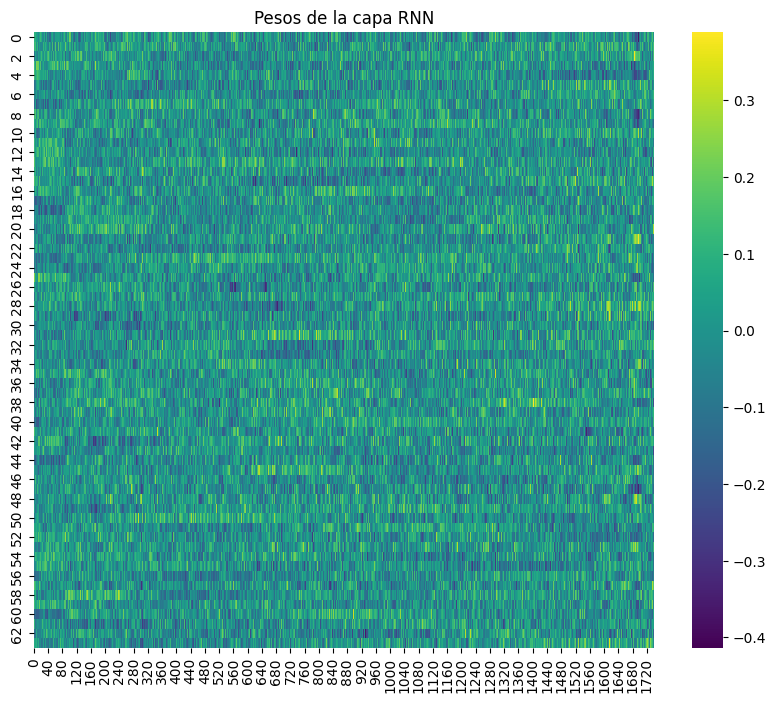

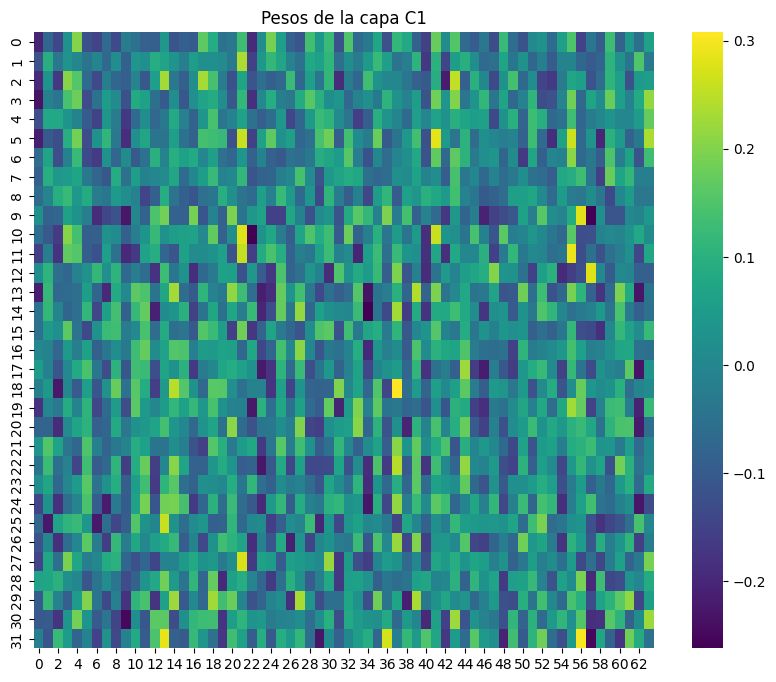

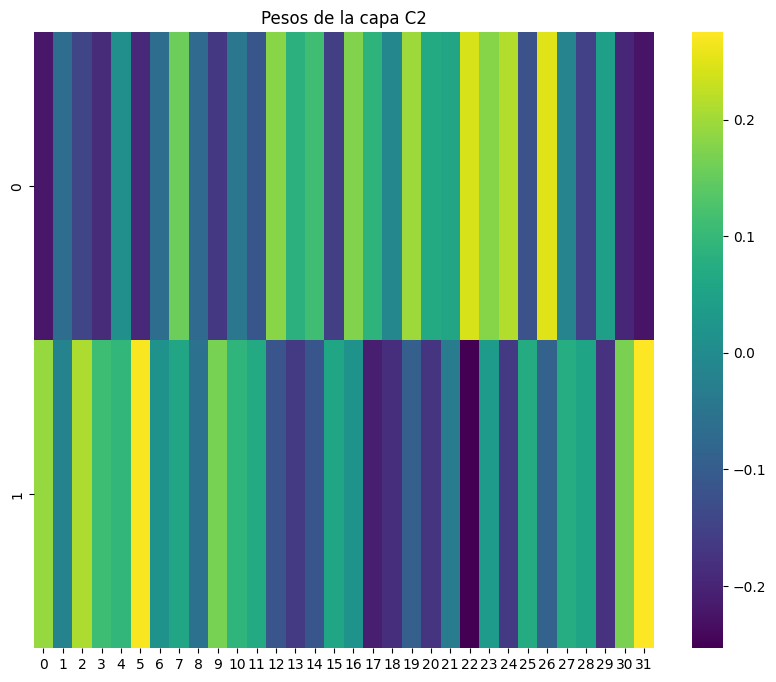

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

#Pesos de la capa RNN
weight_rnn=model.rnn.weight_ih_l0.detach().cpu().numpy()
plt.figure(figsize=(10,8))
sns.heatmap(weight_rnn, cmap="viridis",annot=False)
plt.title("Pesos de la capa RNN")

#Pesos de la capa C1
weight_fc1=model.fc1.weight.detach().cpu().numpy()
plt.figure(figsize=(10,8))
sns.heatmap(weight_fc1, cmap="viridis",annot=False)
plt.title("Pesos de la capa C1")
plt.show()

#Pesos de la capa C2
weight_fc2=model.fc2.weight.detach().cpu().numpy()
plt.figure(figsize=(10,8))
sns.heatmap(weight_fc2, cmap="viridis",annot=False)
plt.title("Pesos de la capa C2")
plt.show()


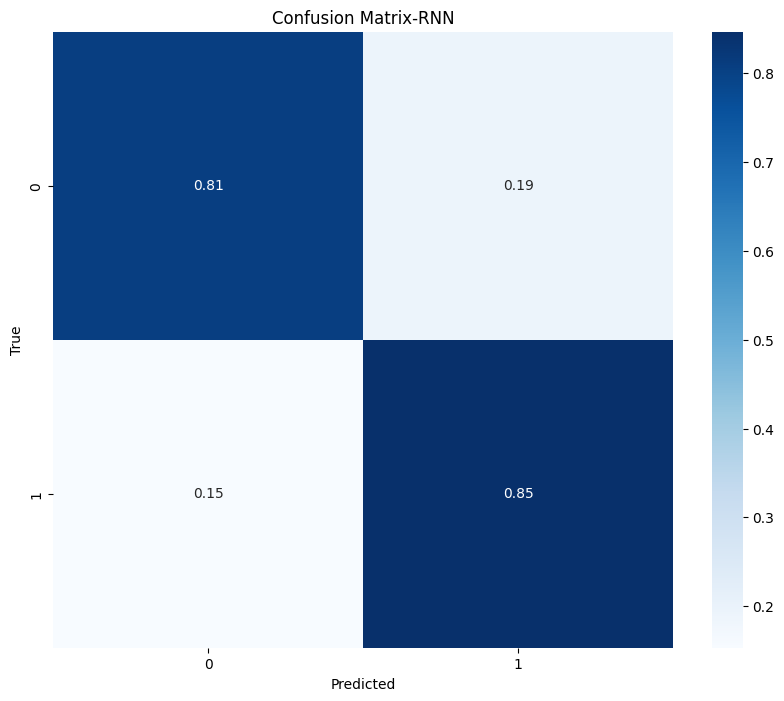

In [112]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

test_data=[]
test_labels=[]
model.eval()
predictions=[]
true_labels=[]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels= labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

cm=confusion_matrix(true_labels,predictions)
cm_porcentaje=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

plt.figure(figsize=(10,8))
sns.heatmap(cm_porcentaje, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix-RNN')
plt.show()


## GRU


In [123]:
import torch.nn as nn
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size=input_size,
                          hidden_size=hidden_size,
                          num_layers=num_layers,
                          batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(hidden_size, hidden_size//2)
        self.fc2 = nn.Linear(hidden_size//2, 2)

    def forward(self, window):
      ##window step
        batch_size = window.size(0)
        h0 = torch.zeros(self.gru.num_layers, batch_size, self.gru.hidden_size).to(window.device)
        out, _ = self.gru(window, h0)
        out = self.dropout(out)
        last_hidden = out[:, -1, :]
        out = F.relu(self.fc(last_hidden))
        output= self.fc2(out)
        return torch.sigmoid(output)


input_size = mfcc_tensor.shape[1]
hidden_size = 64
output_size = 2

# Crear el modelo
model = GRUModel(input_size, hidden_size, output_size)

In [124]:
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Crear DataLoader para entrenamiento
train_dataset = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Crear DataLoader para prueba
test_dataset = TensorDataset(test_x, test_y)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# perdida y opt
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 15
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.unsqueeze(1)
        labels = F.one_hot(labels.to(torch.int64), num_classes=2).float()

        optimizer.zero_grad()
        outputs = model(inputs)

        # Calcular la pérdida
        loss = criterion(outputs, labels)

        # Realizar la retropropagación
        loss.backward()
        optimizer.step()

        # Acumular la pérdida
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Pérdida: {running_loss/len(train_loader)}")

# Guardar el modelo entrenado
torch.save(model.state_dict(), 'GRU_model.pth')

Epoch 1/15, Pérdida: 0.43452978716061935
Epoch 2/15, Pérdida: 0.35467691072364793
Epoch 3/15, Pérdida: 0.33734166853293013
Epoch 4/15, Pérdida: 0.3219170391722752
Epoch 5/15, Pérdida: 0.30905503975431414
Epoch 6/15, Pérdida: 0.29086212332557587
Epoch 7/15, Pérdida: 0.2910304492081169
Epoch 8/15, Pérdida: 0.2822950629612608
Epoch 9/15, Pérdida: 0.26441143260058697
Epoch 10/15, Pérdida: 0.2553529569158589
Epoch 11/15, Pérdida: 0.24320883759345016
Epoch 12/15, Pérdida: 0.23715258676585924
Epoch 13/15, Pérdida: 0.21969153458782792
Epoch 14/15, Pérdida: 0.2160754545734529
Epoch 15/15, Pérdida: 0.20705298352034857


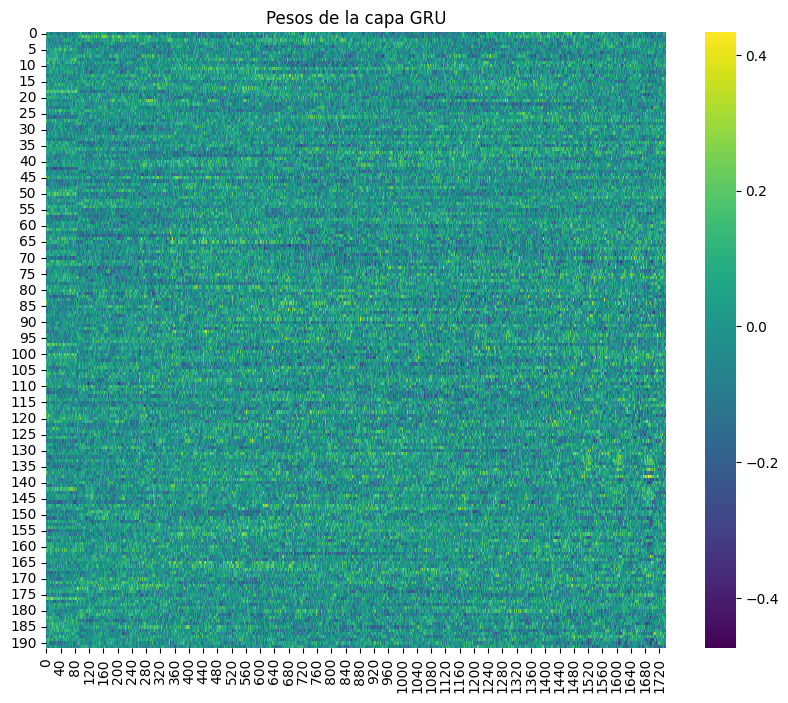

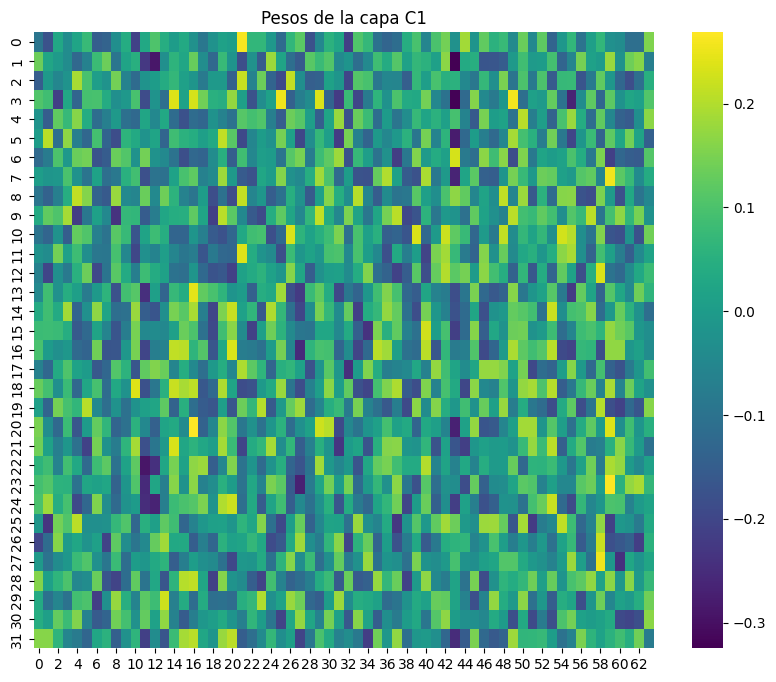

Text(0.5, 1.0, 'Pesos de la capa C2')

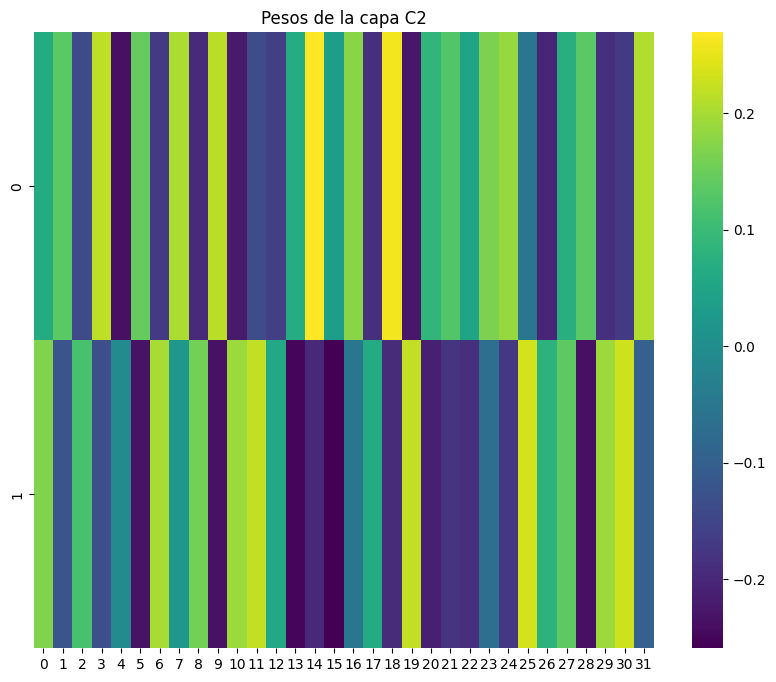

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

#Pesos de la capa GRU
weight_rnn=model.gru.weight_ih_l0.detach().cpu().numpy()
plt.figure(figsize=(10,8))
sns.heatmap(weight_rnn, cmap="viridis",annot=False)
plt.title("Pesos de la capa GRU")

#Pesos de la capa FC
weight_fc1=model.fc.weight.detach().cpu().numpy()
plt.figure(figsize=(10,8))
sns.heatmap(weight_fc1, cmap="viridis",annot=False)
plt.title("Pesos de la capa C1")
plt.show()

#pesos de la cpaa fc2
weight_fc2=model.fc2.weight.detach().cpu().numpy()
plt.figure(figsize=(10,8))
sns.heatmap(weight_fc2, cmap="viridis",annot=False)
plt.title("Pesos de la capa C2")


In [127]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

Precisión en el conjunto de prueba: 82.08%


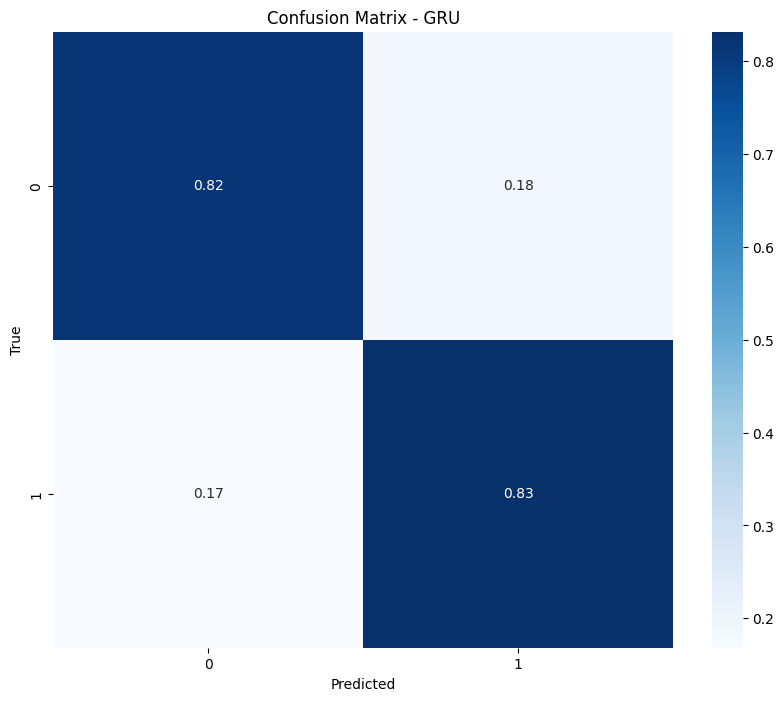

In [122]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

test_data=[]
test_labels=[]
model.eval()
predictions=[]
true_labels=[]

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        labels= labels.to(device)

        if inputs.dim() == 2:
          inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

cm=confusion_matrix(true_labels,predictions)
cm_porcentaje=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]

plt.figure(figsize=(10,8))
sns.heatmap(cm_porcentaje, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - GRU')
plt.show()
